# Байесовская статистика
## Задание B.2


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---

**Баллы за задание:**

* Задача 1 — 20 баллов
* Задача 2 — 60 баллов
* Задача 3 — 40 баллов
* Задача 4 — 30 баллов
* Задача 5 — 40 баллов
* Задача 6 — 25 баллов
---

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats import multitest

# параллельные вычисления
from joblib import Parallel, delayed

import scikit_posthocs as sp

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Bot check

# HW_ID: ds_bayes2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

Из BS1 задача 7

---
### Задача 7

Предположим, что выборка из распределения $\mathcal{N}(\theta_1, \theta_2^{-1})$ приходит постепенно по 5 наблюдений за один раз. До получения первой партии из 5 наблюдений отсутствует какая-либо информация о значениях параметров $\theta = (\theta_1, \theta_2)$. После получения очередной партии наблюдений вычисляется апостериорное распределение параметров, используя в качестве априорного распределения предыдущее апостериорное распределение. Промоделируйте и визуализируйте такой эксперимент и опишите, как меняются знания о параметрах в процессе эксперимента.

$\theta_1$ генерируем нормально, а $\theta_2$ из гамма распределения (нужна положительность), генерируем согласно формулам ниже


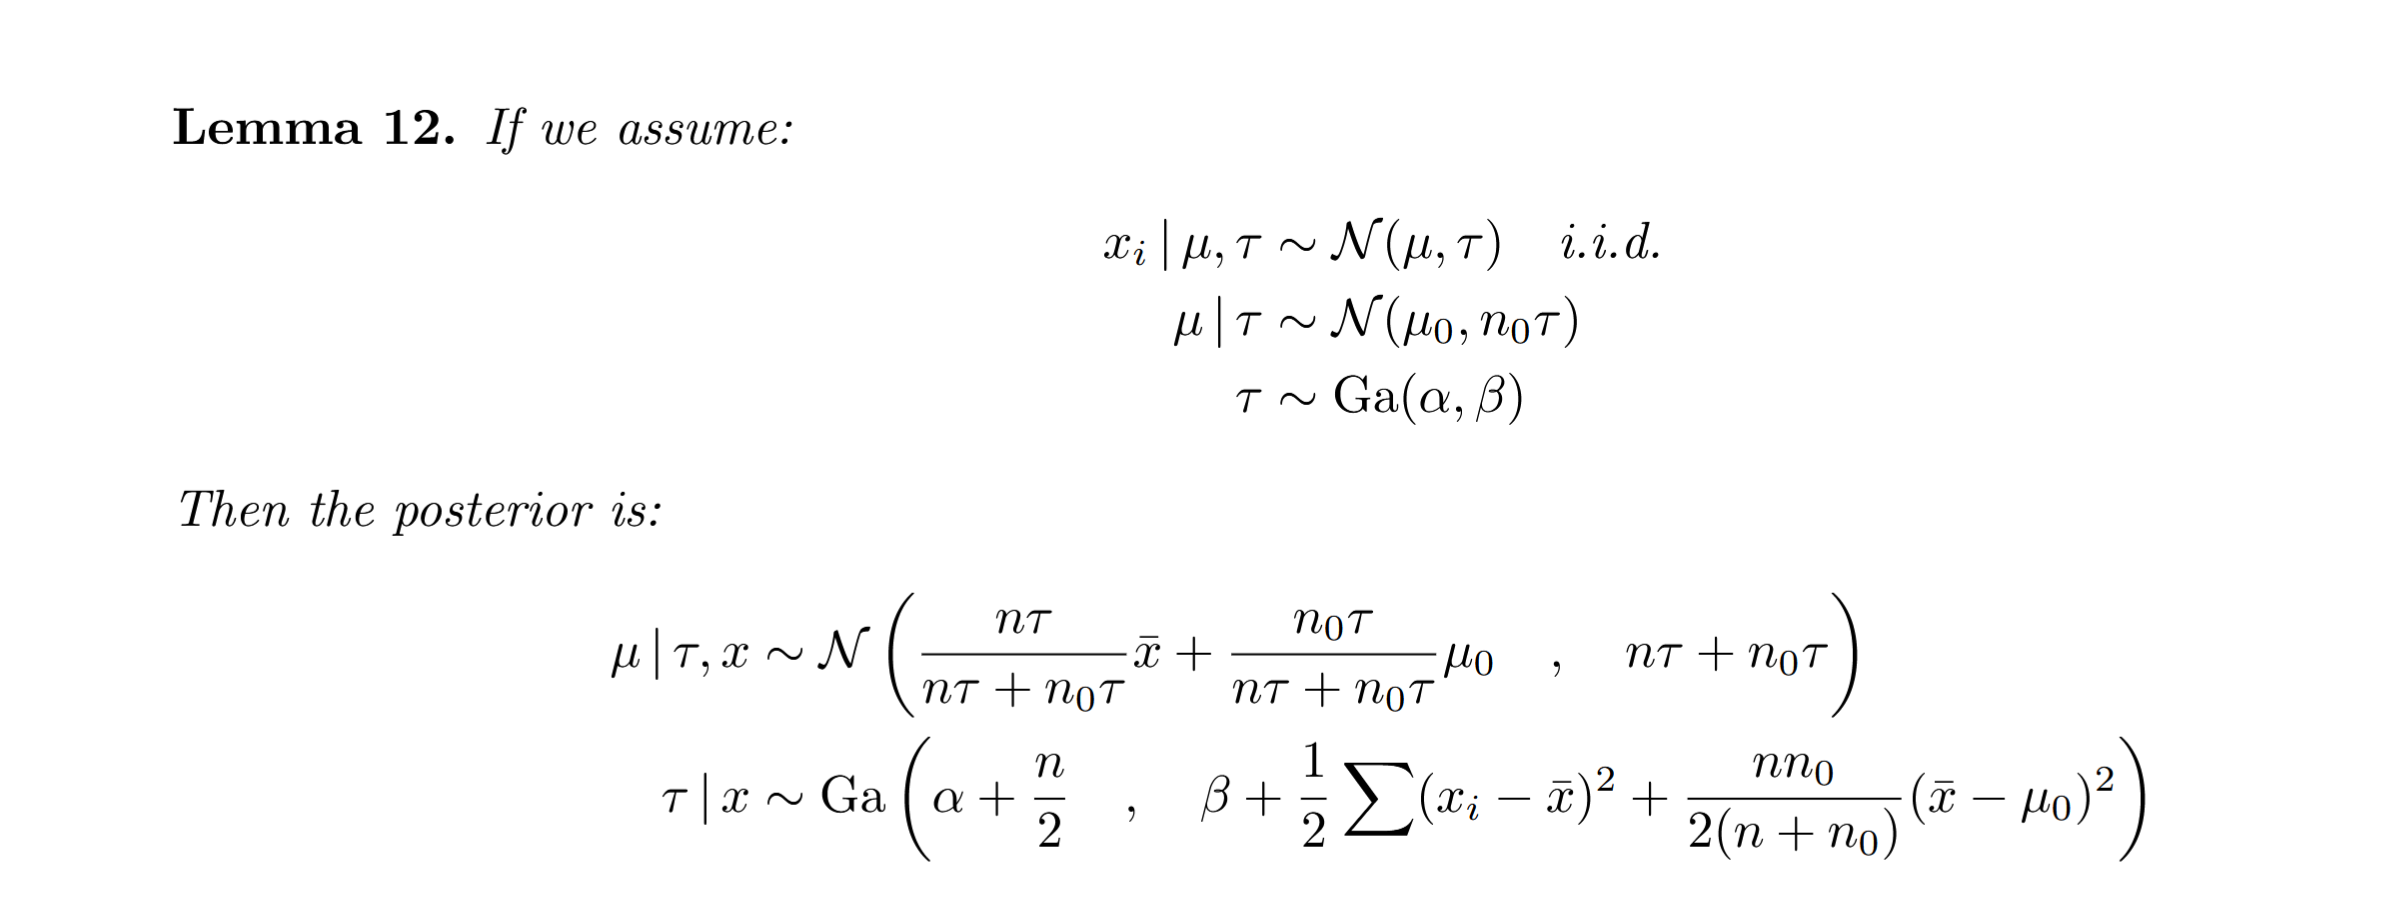

In [138]:
from IPython.display import Image
Image('params.png') 

Обновляем параметры согласно формулам выше

In [141]:
def update_posterior(batch, mu_prev, n0_prev, alpha_prev, beta_prev):
    n = len(batch)
    x_bar = np.mean(batch)
    sum_sq = np.sum((batch - x_bar)**2)
    
    new_mu0 = (n * x_bar + n0_prev * mu_prev) / (n + n0_prev)
    new_n0 = n + n0_prev

    new_alpha = alpha_prev + n / 2
    new_beta = beta_prev + 0.5 * sum_sq + 0.5 * (n * n0_prev) / (n + n0_prev) * (x_bar - mu_prev)**2
    
    return new_mu0, new_n0, new_alpha, new_beta

Запуск

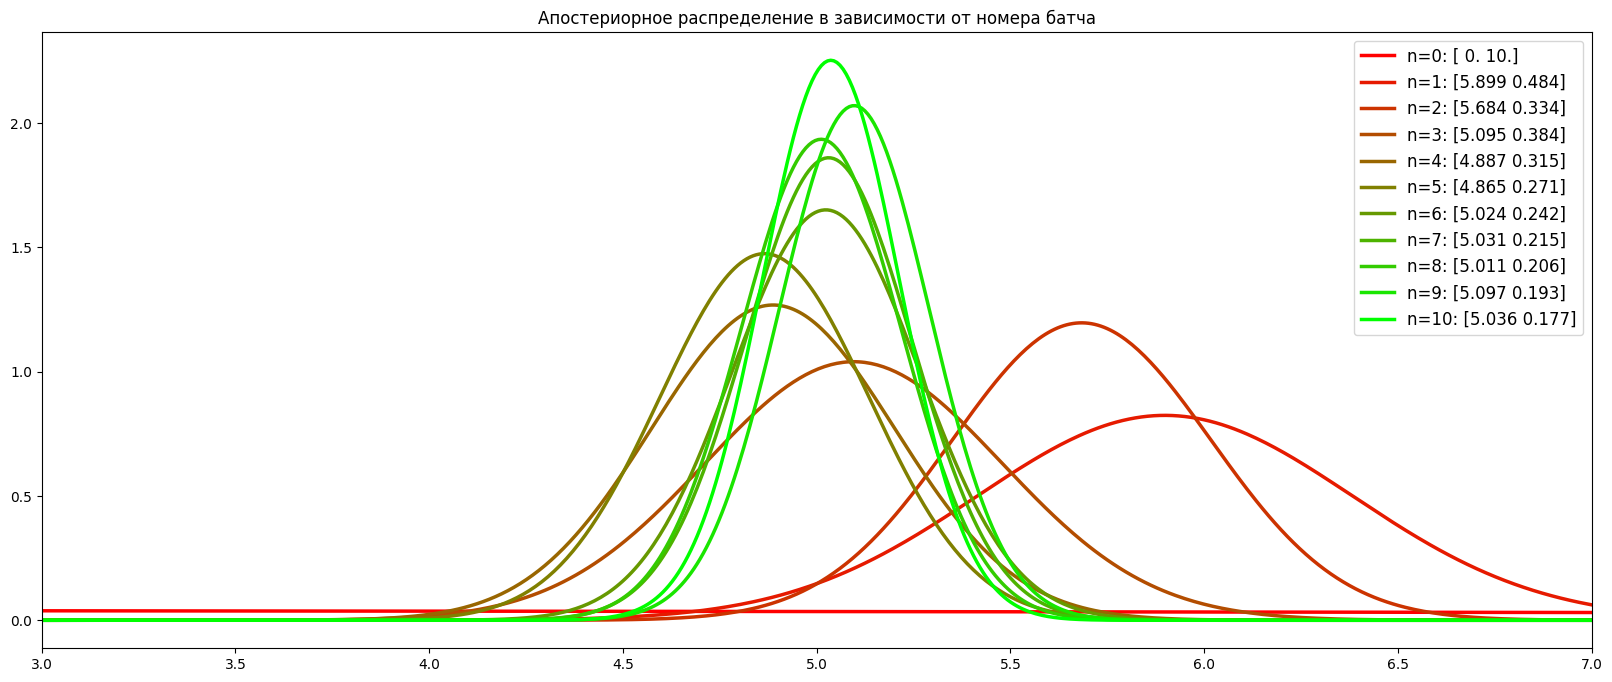

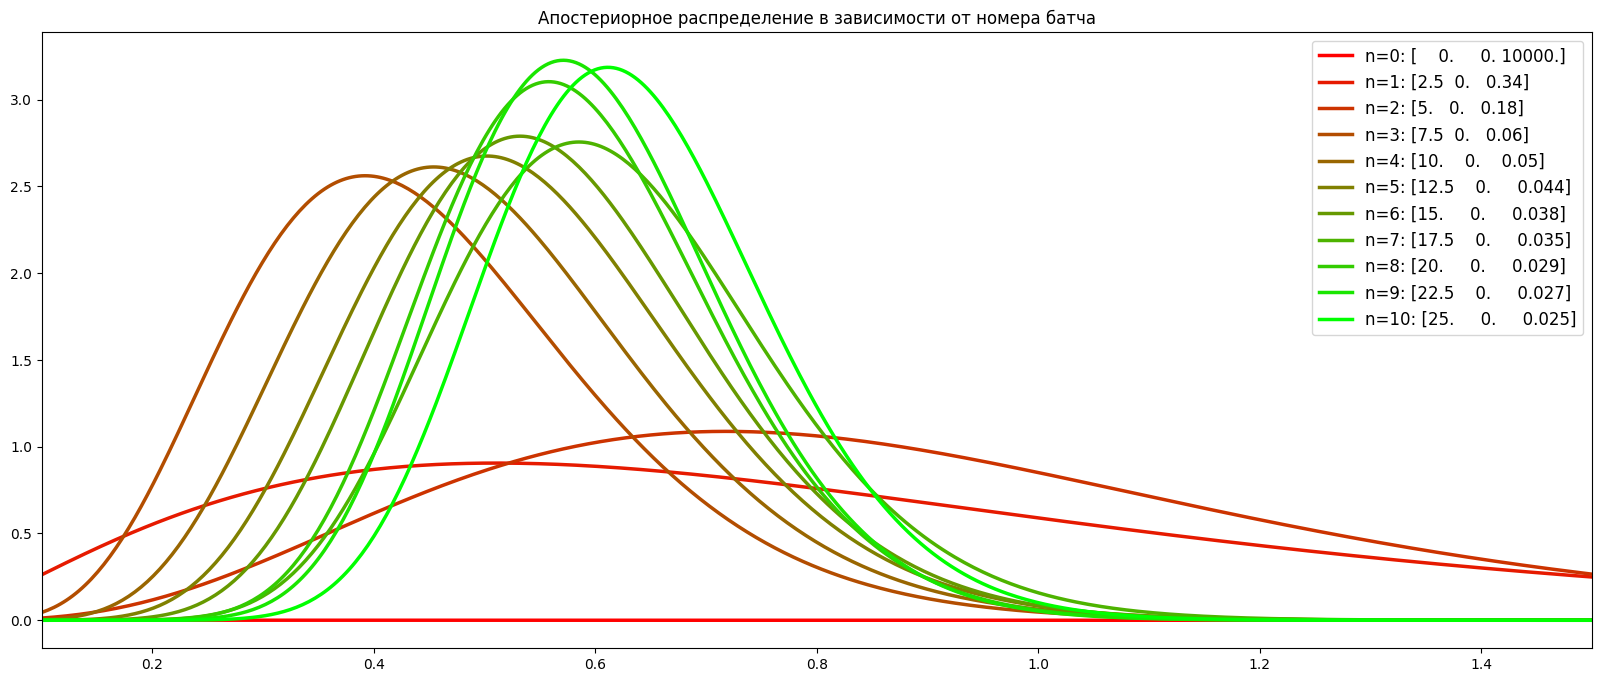

In [152]:
theta1_true = 5
theta2_true = 2
tau_true = 1 / theta2_true

mu0_prior = 0
n0_prior = 0.01
alpha_prior = 0.0001
beta_prior = 0.0001

batch_size = 15
num_batches = 10

posterior_params = []
mu_current, n0_current = mu0_prior, n0_prior
alpha_current, beta_current = alpha_prior, beta_prior
posterior_params.append((mu_current, n0_current, alpha_current, beta_current))

for batch in data_batches:
    mu_current, n0_current, alpha_current, beta_current = update_posterior(
        batch, mu_current, n0_current, alpha_current, beta_current
    )
    posterior_params.append((mu_current, n0_current, alpha_current, beta_current))

mu_post_params = []
tau_post_params = []

for params in posterior_params:
    mu0, n0, alpha, beta = params
    E_tau = alpha / beta
    sigma = 1 / np.sqrt(n0 * E_tau)
    mu_post_params.append((mu0, sigma))
    
    tau_post_params.append((alpha, 0, 1/beta))

mu_post_params = np.array(mu_post_params)
tau_post_params = np.array(tau_post_params)

mu_grid = np.linspace(3, 7, 500)
tau_grid = np.linspace(0.1, 1.5, 500)

draw_posteriori(mu_grid, sps.norm, mu_post_params, xlim=(3, 7))

draw_posteriori(tau_grid, sps.gamma, tau_post_params, xlim=(0.1, 1.5))

Действительно, есть сходимость к истинным значениям параметров - 5 и 1/2=0.5

--- 

### Задача 1

Дана выборка из распределения $Bern(\theta)$:

In [3]:
sample = np.array([
    1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 
    0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0
])

В качестве априорного на $\theta$ рассматривается треугольное распределение:

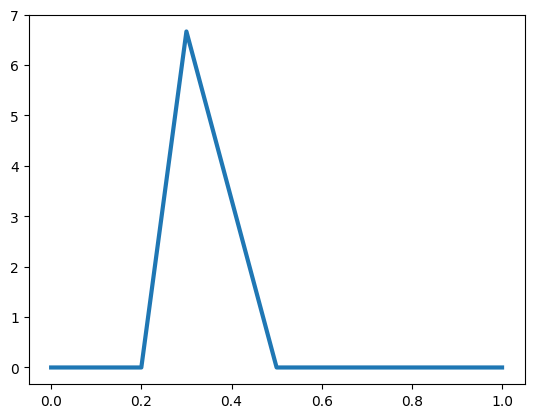

In [4]:
grid = np.linspace(0, 1, 1001)
dens = sps.triang(c=1/3, loc=0.2, scale=0.3).pdf(grid)

plt.plot(grid, dens, lw=3)
plt.show()

С помощью метода Монте-Карло постройте апостериорное распределение и найдите его математическое ожидание.

Формула совместного распределения:

$$f(x, t) = q(t) p_t(X) = q(t) t^{\sum X_i} (1-t)^{n - {\sum X_i}}$$

Апостериорное распределение получается нормировкой

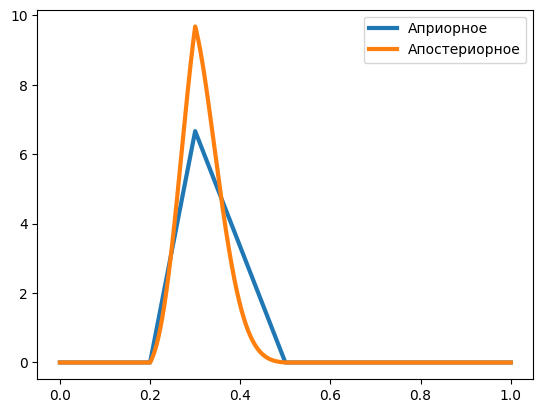

In [5]:
f_dens = dens * (grid ** np.sum(sample)) * ((1 - grid) ** (sample.shape[0] - np.sum(sample)))
apost = f_dens / np.mean(f_dens)

plt.plot(grid, dens, lw=3, label='Априорное')
plt.plot(grid, apost, lw=3, label='Апостериорное')
plt.legend()
plt.show()

Осталось найти матожидание

In [6]:
print(f"Матожидание: {np.mean(apost * grid):.3f}")

Матожидание: 0.314


__________________
### Задача 2

В качестве байесовского доверительного интервала обычно рассматривают *область наибольшей плотности* (HDR, high density region) апостериорного распределения. 

Если $q(t)$ &mdash; плотность некоторого распределения, то множество $A$ называется $\alpha$-HDR, если 
* для некоторой $c > 0$ выполнено $\forall x \in A: q(t) \geqslant c$ и $\forall x \notin A: q(t) < c$, то есть внутри $A$ плотность выше, чем вне $A$;
* вероятность события $A$ не меньше $\alpha$
$$\int\limits_A q(t) dt \geqslant \alpha.$$

Как и для доверительных интервалов, при возможности стоит рассматривать такое множество, на котором достигается равенство в последнем неравенстве.

На схеме ниже приведена двумодальная плотность и визуализированы 0.75-HDR, состоящая из двух интервалов, а также доверительные интервалы, построенные с помощью среднего и дисперсии, а также квантилей.

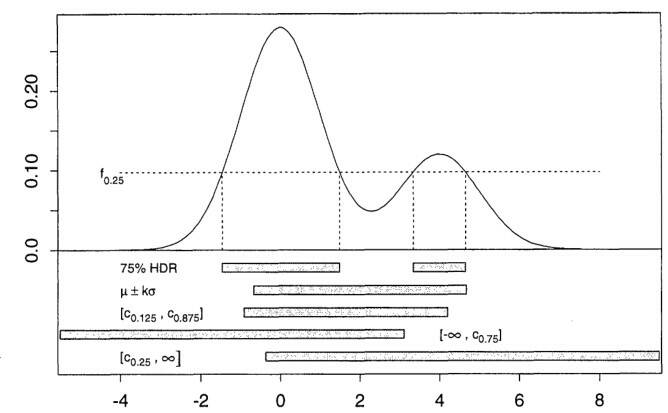


Напишите функцию, вычисляющую с некоторой точностью HDR для заданного распределения. Она должна уметь даже с распределениями, имеюшими странные или неограниченные носители, а также с такими расперделениями, про которые вообще мало что известно. Поэтому решение, где нужно заранее указывать область, на которой осуществляется поиск будет оценено в половину баллов. Можете считать, что у вас есть объект, у которого есть методы `pdf`, выдающий плотность в переданных точках и `rvs`, выдающий выборку заданного размера.

*Совет.* Для поиска $c$ используйте бинпоиск.

In [7]:
def HDR_computation(density, sample_size, alpha, precision=0.001):
    """
    Функция, вычисляющая HDR
    density -- плотность распределения
    sample_size -- размер выборки, по которой будет подгоняться HDR
                (на ней ищутся минимум/максимум плотности и оценивается носитель)
    alpha -- требуемая вероятность
    precision -- точность, на которой остановится процедура бинпоиска параметра c

    returns:
    grid   -- сетка, по которой искалось множество A
    hdr_mask -- для каждой точки сетки 1 если принадлежит А,
              0 - иначе
    c -- константа, разделяющая носитель на множество A и его дополнение
    """
    sample = density.rvs(sample_size)
    grid = np.linspace(np.min(sample), np.max(sample), sample_size)
    answer = grid.copy()
    left_c, right_c = np.min(density.pdf(sample)), np.max(density.pdf(sample))
    while right_c - left_c > precision:
        mid_c = (right_c + left_c) / 2
        answer = grid[density.pdf(grid) >= mid_c]
        current_alpha = np.sum(density.pdf(answer)) * (grid[1] - grid[0])
        if current_alpha > alpha:
            left_c = mid_c
        else:
            right_c = mid_c
    
    return grid, (density.pdf(grid) >= left_c).astype(int), left_c

Визуализация работы. Для начала определим сместь распределений

In [8]:
class MixtureDensity:
    def __init__(self, components, weights):
        self.components = components
        self.weights = weights / np.sum(weights) 
    
    def pdf(self, x):
        return np.sum(w * dist.pdf(x) for w, dist in zip(self.weights,
                                                         self.components))
    
    def rvs(self, size):
        samples = np.concatenate([dist.rvs(int(size * w)) for w,
                                  dist in zip(self.weights, self.components)])
        np.random.shuffle(samples)
        return samples

Построим результат работы

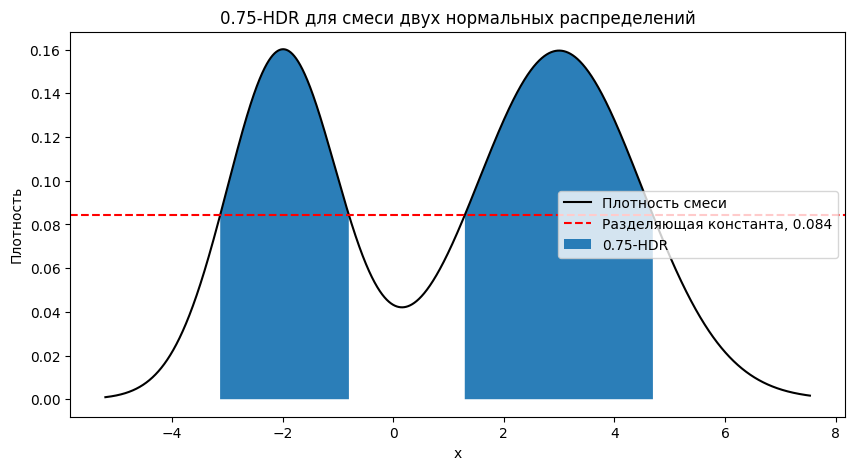

In [10]:
components = [sps.norm(loc=-2, scale=1), sps.norm(loc=3, scale=1.5)]
weights = np.array([0.4, 0.6])
mixture = MixtureDensity(components, weights)

grid, hdr_mask, const = HDR_computation(mixture, sample_size=5000,
                                 alpha=0.75, precision=0.001)

plt.figure(figsize=(10, 5))
y = mixture.pdf(grid)

plt.plot(grid, y, label="Плотность смеси", color="black")
plt.axhline(y=const, label=f"Разделяющая константа, {const:.3f}", color = 'r', linestyle = '--')
plt.fill_between(grid, mixture.pdf(grid) * hdr_mask, alpha=0.95, label=f"0.75-HDR")
plt.xlabel("x")
plt.ylabel("Плотность")
plt.title("0.75-HDR для смеси двух нормальных распределений")
plt.legend()
plt.show()

Честно оценим полученную вероятность

In [11]:
print(f"Вероятность: {np.sum(mixture.pdf(grid) * hdr_mask) * (grid[1] - grid[0]):.3f}")

Вероятность: 0.751


Что и требовалось

__________________
### Задача 3

Пусть $X_1, ..., X_n$ &mdash; выборка из распределения $Bern(\theta)$. В качестве априорного на $\theta$ рассматривается сопряжённое распределение. Исследуйте влияние параметров априорного распределения на скорость сходимости к истинному значению параметра.

Для экспериментов используйте истинное значение $\theta=0.15$. В качестве скорости сходимости рассматривайте минимальное количество элементов выборки, необходимое для выполнения двух условий:
* $\theta$ принадлежит 0.95-HDR,
* 0.95-HDR достаточно узкий &mdash; его ширина не превосходит 0.01.

Учтите, что эксперименты имеют стохастический характер.

*Как сделать вывод.*
* Рекомендации вида "брать такое априорное, которое ближе к истинному значению параметра" некорректны, поскольку само истинное значение параметра не известно. Какую-либо рекомендацию вообще дать невозможно.
* Заключения вида "если мы угадаем правильное априорное, то сойдемся быстро" также некорректны. Если мы как-то можем угадать "правильное" априорное распределение, то почему бы сразу не угадывать значение параметра?
* Априорное распределение &mdash; наши знания или представления о природе явления до начала эксперимента. Они могут примерно совпадать с реальностью или сильно отличаться от неё. В первом случае достаточно небольшого количества наблюдений для подтверждения наших знаний, во втором &mdash; потребуется достаточно большое количество наблюдений для переубеждения. Кроме того, на количество наблюдений влияет также то, насколько мы уверенны в наших априорных знаниях. Ваша задача &mdash; охарактеризовать подобным образом параметры сопряжённого семейства распределений к бернуллиевскому семейству.


Вспомогательные функции

In [54]:
def bern_posterior_params(sample, a, b):
    '''Находит параметры апостериорного распределения 
    
    :param sample: выборка
    :param a: параметр alpha априорного распределения
    :param b: параметр beta априорного распределения
    
    :returns: параметры апостериорного
    '''
    n_1, n_2 = np.sum(sample == 1), np.sum(sample == 0)
    return n_1 + a, n_2 + b
    
def run_1_iteration(generate_sample, a, b, theta,
                    size, batch_size, start_sample_size):
    """
    Проведение 1 итерации эксперимента

    :param generate_sample: функция генерации выборки
    :param a: параметр alpha априорного распределения
    :param b: параметр beta априорного распределения
    :param theta: истинное значение theta
    :param size: размер максимальной выборки
    :param batch_size: размер батча
    :param start_sample_size: стартовый размер выборки
    
    :returns: needed_size: необходимый размер выборки
    """
    sample = generate_sample(size)
    a_post, b_post = bern_posterior_params(sample[:start_sample_size],
                                          a, b)
    for i in range(start_sample_size, len(sample), batch_size):
        batch_sample = sample[i:i+batch_size]
        a_post, b_post = bern_posterior_params(batch_sample, a_post, b_post)
        grid, hdr_mask, _ = HDR_computation(sps.beta(a_post, b_post),
                                                sample_size=int(size/10),
                                                alpha=0.95, precision=0.01)
        result_set = grid[hdr_mask == 1]
        lower, upper = result_set[0], result_set[-1]
        width = upper - lower
        if (theta >= lower) and (theta <= upper) and (width <= 0.01):
            return i
    return size
        
def visualize_experiment(needed_sizes, title=None):
    """
    Визуализация распределения минимального размера выборки
    
    :param needed_sizes: массив минимальных размеров выборки по итерациям эксперимента
    :param title: заголовок графика (опционально)
    """
    plt.figure(figsize=(8, 5))
    plt.hist(needed_sizes, bins=30, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plt.xlabel("Минимальный размер выборки")
    plt.ylabel("Плотность")
    plt.title(title if title else "Распределение минимального размера выборки")
    plt.show()

def run_experiments(generate_sample, a, b, theta, n_iter=100,
                    max_size=1000, batch_size=100, start_sample_size=1,
                    n_jobs=4, draw=True, title=None):
    """
    Проведение серии экспериментов: для каждого эксперимента наращиваем выборку до достижения условий.
    
    :param generate_sample: функция для генерации выборки из Бернули с истинным параметром theta
    :param a: параметр alpha априорного распределения
    :param b: параметр beta априорного распределения
    :param theta: истинное значение параметра θ (например, 0.15)
    :param n_iter: количество итераций эксперимента
    :param max_size: максимальный размер выборки для одной итерации
    :param batch_size: размер батча
    :param start_sample_size: стартовый размер выборки
    :param n_jobs: число параллельных процессов
    :param draw: флаг, строить ли визуализацию
    :param title: заголовок для графика
    :returns: массив минимальных размеров выборки, необходимых для достижения условий
    """
    results = Parallel(n_jobs=n_jobs)(
        delayed(run_1_iteration)(generate_sample, a, b, theta,
                                 max_size, batch_size, start_sample_size) 
        for _ in tqdm(range(n_iter), leave=False)
    )
    results = np.array(results)
    
    if draw:
        visualize_experiment(results, title=title)
    
    return results

Запуск

In [55]:
beta_params = {
    "Ничего не известно (a=1, b=1)": (1, 1),
    "Монета скорее нечестная, перевес в сторону theta=0 (a=2, b=15)": (2, 15),
    "Монета скорее нечестная, перевес неизвестен (a=0.5, b=0.5)": (1/2, 1/2),
    "Монета скорее честная (a=10, b=10)": (10, 10),
    "Монета скорее честная, либо с небольшим перекосом theta=1 (a=7, b=5)": (7, 5),
    "Монета скорее нечестная, перевес в сторону theta=1 (a=15, b=2)": (15, 2),
}

true_theta = 0.15
n_iter = 10
max_sample_size = 30000
batch_size = 10

results = {}

for name, (a_prior, b_prior) in tqdm(beta_params.items(), leave=False):
    needed_sizes = run_experiments(
        lambda size: np.random.binomial(1, true_theta, size),
        a=a_prior,
        b=b_prior,
        theta=true_theta,
        n_iter=n_iter,
        max_size=max_sample_size,
        batch_size=batch_size,
        start_sample_size=17000,
        n_jobs=8,
        draw=False,
        title=f"{name}"
    )
    print(f"{name}")
    print(f"Средний размер требуемой выборки: {np.mean(needed_sizes):.2f}\n")


  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

Ничего не известно (a=1, b=1)
Средний размер требуемой выборки: 19639.00



  0%|          | 0/10 [00:00<?, ?it/s]

Монета скорее нечестная, перевес в сторону theta=0 (a=2, b=15)
Средний размер требуемой выборки: 19622.00



  0%|          | 0/10 [00:00<?, ?it/s]

Монета скорее нечестная, перевес неизвестен (a=0.5, b=0.5)
Средний размер требуемой выборки: 19414.00



  0%|          | 0/10 [00:00<?, ?it/s]

Монета скорее честная (a=10, b=10)
Средний размер требуемой выборки: 19505.00



  0%|          | 0/10 [00:00<?, ?it/s]

Монета скорее честная, либо с небольшим перекосом theta=1 (a=7, b=5)
Средний размер требуемой выборки: 20664.00



  0%|          | 0/10 [00:00<?, ?it/s]

Монета скорее нечестная, перевес в сторону theta=1 (a=15, b=2)
Средний размер требуемой выборки: 20060.00



1) Если априорное лучше приближает реальное, то у нас меньше размер выборки
2) Сильно истинное уверенное априорное быстрее сходится, чем не сильно уверенное
3) Сильно ложное уверенное априорное распределение отвернуть проще, поэтому требуется меньший размер выборки
(поэтому `Монета скорее нечестная, перевес в сторону theta=1` сходится быстрее, чем `Монета скорее честная, либо с небольшим перекосом theta=1`)

Если говорить о параметрах сопряженного распределения:

1) Отношeние $a/b$ отвечает за степень уверенности отклонения в сторону $theta=1$
2) Абсолютное значение $max(a, b)$ отвечает за то, насколько узкий интервал априорного распределения

__________________
### Задача 4

Пусть $X = (X_1, ..., X_n)$ &mdash; выборка из экспоненциального распределения с параметрами сдвига $\theta_1$ и масштаба $\theta_2$. Плотность распределения имеет вид
    $$p_\theta(x) = \theta_2 e^{\theta_2 (\theta_1 - x)} I\{x \geqslant \theta_1\}.$$

Найдите апостериорное распределений (с учётом константы) если
* используется неинформативный априор(можете взять любой на ваш выбор);
* используется сопряжённое распределение в качестве априорного.

$$q(\theta_1, \theta_2 | x) \varpropto q(\theta_1, \theta_2) \theta_2^n e^{\theta_2 (n\theta_1 - \sum X_i)} I\{min(X_i) \geqslant \theta_1\}$$

a) Возьмем неинформативный априор как на семинаре

$$q(\theta_1, \theta_2) \varpropto 1/\theta_2$$

Имеем 

$$q(\theta_1, \theta_2 | x) \varpropto \theta_2^{n-1} e^{\theta_2 (n\theta_1 - \sum X_i)} I\{min(X_i) \geqslant \theta_1\}$$

Нормировочную константу находим из условия:

$$\int_{\mathbb R^2} q(\theta_1, \theta_2 | x) d\theta_1d\theta_2 = 1$$

$$\int_{0}^{+\infty}\theta_2^{n-1} \exp(\theta_2(n \theta_1 - \sum X_i)) d \theta_2 = \frac{\Gamma(n)}{(\sum X_i - n\theta_1)^n}$$

$$\int_{-\infty}^{min(X_i)} \frac{\Gamma(n)}{(\sum X_i - n\theta_1)^n} d\theta_1 = \frac{\Gamma(n)}{n} \frac{1}{(\sum X_i - n\theta_1)^{n-1}(n-1)}$$

Откуда

$$q(\theta_1, \theta_2 | x) = \frac{1}{C} \theta_2^{n-1} e^{\theta_2 (n\theta_1 - \sum X_i)} I\{min(X_i) \geqslant \theta_1\}$$
$$C = \frac{n}{\Gamma(n)} (\sum X_i - n\theta_1)^{n-1}(n-1)$$

б) Возьмем в качестве сопряженного

$$q(\theta_1, \theta_2) \varpropto \theta_2^{\alpha - 1} \exp(\beta\theta_1\theta_2 - \gamma \theta_2) I\{\delta \geqslant \theta_1\} \varpropto p(\alpha, \beta, \gamma, \delta)$$


Имеем

$$q(\theta_1, \theta_2 | x) = p(\alpha + n, \beta + n, \gamma + \sum X_i, \min[\delta, \min(X_i)])$$

Осталось найти константу (ищу для $p(\alpha, \beta, \gamma, \delta)$)

$$\int_{-\infty}^{\delta} \exp(\beta \theta_1 \theta_2) d \theta_1 = \frac{1}{\beta \theta_2} \exp(\beta\delta\theta_2)$$
$$\int_{0}^{+\infty} \frac{1}{\beta \theta_2} \exp(\beta\delta\theta_2 - \gamma \theta_2) \theta_2^{\alpha - 1} d\theta_2 = \frac{\Gamma(\alpha-1)}{\beta(\gamma - \beta \delta)^{\alpha-1}}$$

Откуда 

$$p(\alpha, \beta, \gamma, \delta) = \frac{\beta(\gamma - \beta \delta)^{\alpha-1}}{\Gamma(\alpha-1)} \theta_2^{\alpha - 1} \exp(\beta\theta_1\theta_2 - \gamma \theta_2) I\{\delta \geqslant \theta_1\}$$

Константа и распределение апостериорного находятся заменой 
$$p(\alpha + n, \beta + n, \gamma + \sum X_i, \min[\delta, \min(X_i)])$$

----

### Задача 5

Вы пришли в казино и решили сыграть в слот-машину (их еще называют однорукими бандитами). Цель раунда &mdash; получить на барабане автомата выигрышную комбинацию и увеличить свою ставку. Предположим, что у каждой слот-машины существует некоторая фиксированная вероятность выигрыша. Причем разные автоматы могут иметь разные вероятности, которые не известны игроку, то есть вам. Изначально игрок ничего не знает про машины и они для него абсолютно одинаковы.

Можно интерпретировать эту задачу по-другому. Пусть у нас есть несколько дизайнов рекламы или формы регистрации. В каждом случае имеется своя вероятность совершить целевое действие, неизвестная для аналитика. Нашей задачей является максимизировать глобальное совершение целевого действия. То есть хотим понять, какой из дизайнов наиболее удачен, потеряв при этом минимальное число целевых действий из-за невыгодных показов.

Но вернемся в казино. Пусть есть 4 слот-машины. Ниже написаны их истинные вероятности выиграть, а так же функция, которая принимает на вход номер машины и возвращает исход раунда: победа ('W') или проигрыш ('L') 

In [56]:
thetas = [0, 0.10, 0.30, 0.40] # Не подглядывайте!

def play(j):
    """Имитирует слот-машину j
    
    :param j: индекс слот-машины
    
    :returns: 'W' или 'L'
    """
    
    return 'W' if sps.bernoulli(p=thetas[j]).rvs() == 1 else 'L'

В качестве распределения параметра $\theta_j$ будем использовать бета-распределение. Заполните массивы параметров $(\alpha_j, \beta_j)$ в соответствии с условием задачи (априорными знаниями):

In [63]:
a  = np.array([0.5 for _ in thetas])
b  = np.array([0.5 for _ in thetas])

Ниже написана функция отрисовки распределения. Проверьте, что вы выбрали параметры правильно:

In [64]:
def plot_distr(alphas, betas):
    """Рисует 4 бета-распределения с заданными параметрами
    
    :param alphas, betas: параметры распределения, список длины 5
    """
    
    grid = np.arange(0, 1, 0.01)
    _, axes = plt.subplots(2, 2, figsize=(10, 5))
    plt.suptitle(r'Распределение вероятности выигрыша', fontsize=14)

    for j, (a, b, ax) in enumerate(zip(alphas, betas, axes.reshape(-1))):
        ax.set_title(f'Слот-машина {j+1}', fontsize=12)
        ax.plot(grid, sps.beta(a, b).pdf(grid), lw=2)
        ax.set_xlabel(r'$\theta$')

    plt.tight_layout()
    plt.show()

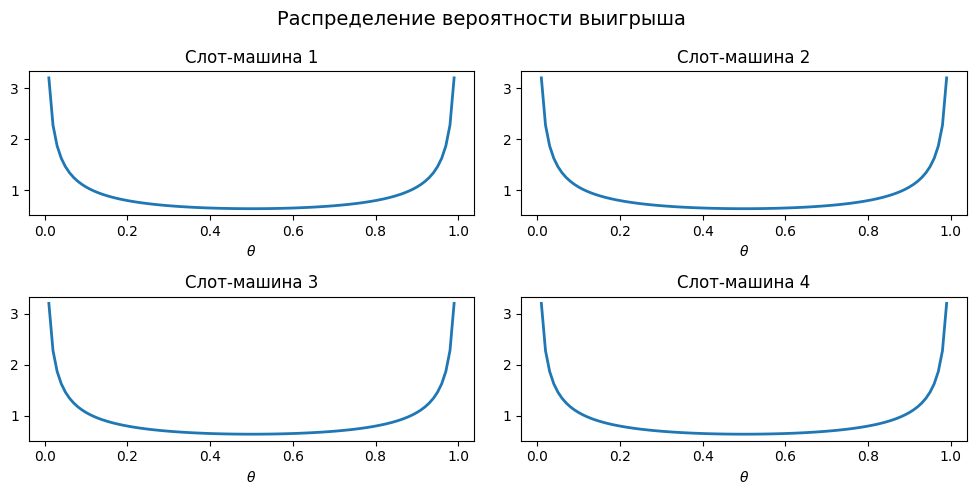

In [65]:
plot_distr(a, b)

Параметры получены через априорное неинформативное распределение Джеффриса `(BS1.4)`

Теперь допишите функцию, которая обновляет текущие параметра распределения машины на основе сыгранного раунда:

In [79]:
def update(alphas, betas, j, play):
    """Обновляет параметры распределений выбранной машины
    
    :param alphas, betas: параметры распределения, списки длины 5
    :param j: номер слот-машины
    :param play: исход раунда, 'W' или 'L' 
    """
    result = (play == 'W')
    alphas[j] += result
    betas[j] += 1 - result
    return alphas, betas

По сути мы хотим неявно проверить множество гипотез $\mathsf{H}_j\colon$ машина $j$ оптимальна, где $j$ &mdash; номер автомата, при этом максимизируя суммарное количество побед.

Игрок хочет выиграть как можно больше и при этом готов сыграть не более 100 раз. Одной из стратегий в данном случае будет сыграть фиксированное и одинаковое число раз на всех автоматах, а затем выбрать тот, у которого наибольшая некоторая оценка вероятности выигрыша. Рассмотрим такой подход. Пусть мы сыграем сначала по 15 раз на каждом из автоматов, а затем оставшиеся 40 на том, который выберем. Посчитайте долю выигрышей в таком подходе:

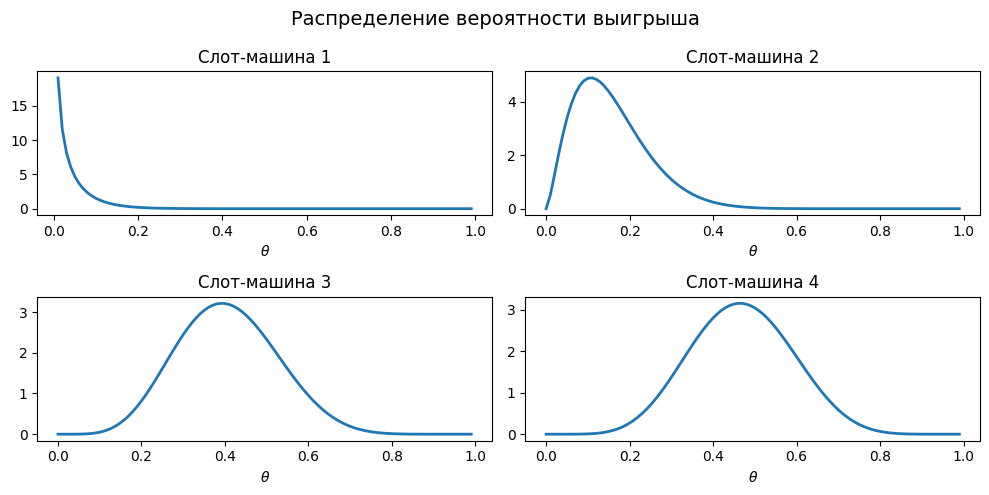

In [98]:
# кэш истории
history = []

a  = np.array([0.5 for _ in thetas])
b  = np.array([0.5 for _ in thetas])

for _ in range(15):
    for j in range(4):
        res = play(j)
        a, b = update(a, b, j, res)
        history.append([res == "W"])
        
plot_distr(a, b)

Выберите наилучший автомат на основе, например, апостериорного матожидания и сыграйте оставшиеся 60 игр на нём:

In [99]:
best_machine = np.argmax(a / (a + b))
best_machine

3

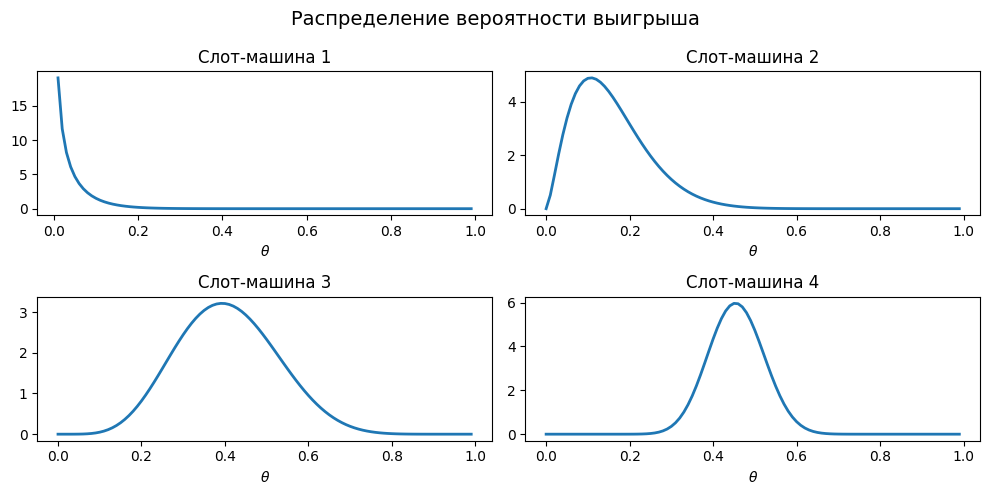

In [100]:
for _ in range(40):
    res = play(best_machine)
    update(a, b, j, res)
    history.append([res == "W"])
        
plot_distr(a, b)

Посчитайте долю побед в такой стратегии:

In [108]:
print(f"Доля побед:{np.mean(np.array(history)):.2f}")

Доля побед:0.33


Заметим, что при такой стратегии много раундов уходит на то, чтоб получить оценку всех параметров. Более того, если оценки вышли неточные, то для дальнейшей игры мы можем выбрать не самый удачный автомат. Чтоб избавиться от этих проблем, рассмотрим другую стратегию. Пусть игрок считает автомат честным и продолжит в него играть, если вероятность выиграть в нем хотя бы $0.3$. Отсюда появляются гипотезы $\mathsf{H}_j^0\colon \theta \geq 0.3 \ \ vs.\ \ \mathsf{H}_j^1\colon \theta < 0.3$, где $j$ &mdash; номер автомата.

Сначала вернитесь к априорным параметрам:

In [176]:
a  = np.array([0.5 for _ in thetas])
b  = np.array([0.5 for _ in thetas])

Допишите функцию, вычисляющую байесовские факторы для гипотез выше:

In [177]:
def testing(alphas, betas):
    """ Вычисляет 4 баесовских фактора
    
    :params alphas, betas: параметры распределения, списки длины 4
    :returns: список длины 4
    """
    result = []
    grid = np.arange(0, 1, 0.01)
    for a, b in zip(alphas, betas):
        pi_1 = sps.beta(0.5, 0.5).cdf(0.3)
        pi_0 = 1 - pi_1
        p_1 = sps.beta(a, b).cdf(0.3)
        p_0 = 1 - p_1
        result.append(p_0 * pi_1 / (p_1 * pi_0))
    return np.array(result)

Дальше игрок выбирает автомат $j$ с наибольшим байесовским фактором в пользу  $\mathsf{H}_j^0$ и играет в него, продолжая пересчитывать параметры распределения. Если вдруг байесовский фактор $\beta_j$ стал меньше другого $\beta_k$, то игрок переходит к автомату $k$. Допишите функции, моделирующие поведение игрока:

In [178]:
def choose(factors):
    """ Выбирает автомат для следующего раунда
    :params factors: байесовские факторы автоматов
    
    :returns: номер автомата 
    """
    
    return np.argmax(factors)

In [179]:
def imitate_game(alphas, betas, rounds_count=100):
    """ Имитирует поведение игрока
    
    :params alphas, betas: параметры априорных распределений
    :params rounds_count: количество сыгранных раундов
    
    :returns: историю раундов ('W'/'L')
    """
    
    history = []
    current_machine = 0
    for _ in range(rounds_count):
        res = play(current_machine)
        alphas, betas = update(alphas, betas, current_machine, res)
        factors = testing(alphas, betas)
        current_machine = choose(factors)
        history.append(res == 'W')
        
    return history

Проведите 100 раундов игры по новой стратегии, визуализируйте полученные апостериорные распределения и посчитайте долю побед:

Доля побед:0.22


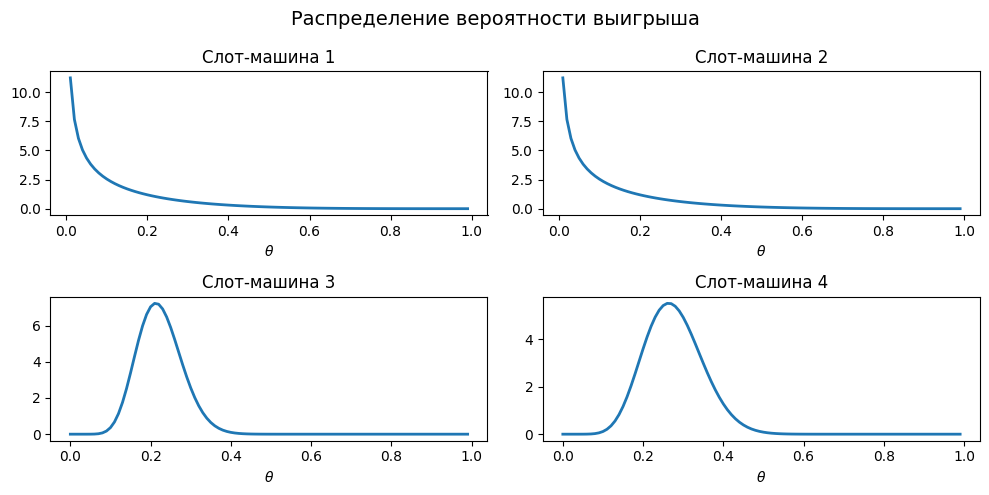

In [180]:
history = imitate_game(a, b, 100)
print(f"Доля побед:{np.mean(np.array(history)):.2f}")
plot_distr(a, b)

Однако в данной стратегии все еще возможен выбор не самой удачной машины. Почему? Предложите и реализуйте третью стратегию, выбор в которой будет основан на байесовских факторах:

Мы по сути в среднем выбираем первую машину, которая отклоняет $H_0$, но вдруг есть лучше? Байесовский фактор дает степень уверенности в H_0, но не учитывает среднее значение при апостериорном - то, насколько автомат лучше. Так, мы можем застрять на неоптимальной машине.

Описание стратегии:

Выбираем машину случайн пропорционально весам, вес это байесовский фактор, умноженный на матожидание параметра апостериорного распределения

In [221]:
from scipy.special import softmax

def choose_softmax(factors, a, b):
    """ Выбирает автомат для следующего раунда
    :params factors: байесовские факторы автоматов
    
    :returns: номер автомата 
    """
    prob = factors * a / (a + b)
    prob = prob / np.sum(prob)
    return np.random.choice(len(factors), p=factors * a / (a + b))

def imitate_game_softmax(alphas, betas, rounds_count=100):
    """ Имитирует поведение игрока
    
    :params alphas, betas: параметры априорных распределений
    :params rounds_count: количество сыгранных раундов
    
    :returns: историю раундов ('W'/'L')
    """
    
    history = []
    current_machine = choose_softmax([1, 1, 1, 1], alphas, betas)
    for _ in range(rounds_count):
        res = play(current_machine)
        alphas, betas = update(alphas, betas, current_machine, res)
        factors = testing(alphas, betas)
        current_machine = choose_softmax(factors, alphas, betas)
        history.append(res == 'W')
        
    return history

Проведите 100 раундов игры по новой стратегии, визуализируйте полученные апостериорные распределения и посчитайте долю побед:

Доля побед:0.36


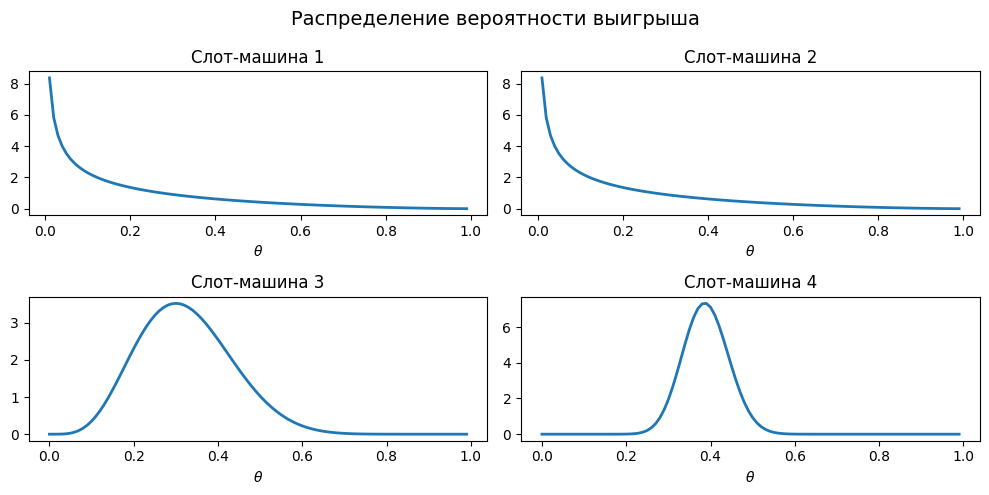

In [222]:
a  = np.array([0.5 for _ in thetas])
b  = np.array([0.5 for _ in thetas])

history = imitate_game_softmax(a, b, 100)
print(f"Доля побед:{np.mean(np.array(history)):.2f}")
plot_distr(a, b)

Получилось лучше - как видно, чаще выбиралась именно 4я машина

---

### Задача 6

Рассмотрим выборку из экспоненциального распределения и гипотезы $\mathsf{H}_0\colon \theta < 0.5 \ vs\ \mathsf{H}_1\colon \theta \geq 0.5$

In [280]:
sample = [
    0.91931224, 2.16737761, 0.05347562, 1.09251725, 2.56295497,
    8.15872914, 0.33232659, 0.4751825 , 3.00461356, 0.87672092,
    0.03906482
]

Подберите сопряжённое априорное так, чтоб априорные вероятности гипотез были примерно равны:

In [281]:
alpha, beta = 1, 1.385
sps.gamma(alpha, scale=1 / beta).cdf(0.5)

0.49967630498676535

Расчитайте байесовский фактор в пользу $\mathsf{H}_0$:

In [282]:
def calculate_coefs(sample, alpha, beta, theta=0.5):
    """ 
    Вычисляет априорный, апостериорный и байесовский коэффициенты в пользу H0
    :params alpha, beta: параметры распределения
    :param theta: theta, задающий гипотезы
    :returns: список длины 2
    """
    sample = np.array(sample)
    pi_0 = sps.gamma(alpha, scale=1/beta).cdf(theta)
    p_0 = sps.gamma(alpha + sample.shape[0], scale=1/(beta + np.sum(sample))).cdf(theta)
    pi_1 = 1 - pi_0
    p_1 = 1 - p_0
    return pi_0 / pi_1, p_0 / p_1, (p_0 * pi_1) / (p_1 * pi_0)

Рассчитаем

In [283]:
print(f"Байесовский коэффициент: {calculate_coefs(sample, alpha, beta)[2]:.2f}")
print(f"Априорный коэффициент: {calculate_coefs(sample, alpha, beta)[0]:.2f}")
print(f"Апостериорный коэффициент: {calculate_coefs(sample, alpha, beta)[1]:.2f}")

Байесовский коэффициент: 0.58
Априорный коэффициент: 1.00
Апостериорный коэффициент: 0.58


Что можно сказать про гипотезы?

**Ответ:** за счет апостериорного коэффициента байесовский уменьшился; скорее отвергаем H_0 (в два раза менее уверены, чем в H_1)

Теперь рассмотрим априорное распределение, в котором $\mathsf{H}_0$ более вероятно, чем $\mathsf{H}_1$ примерно в 2 раза:

In [284]:
a_prior = 1
b_prior = 0.5

Проведите проверку гипотез:

In [285]:
print(f"Байесовский коэффициент: {calculate_coefs(sample, a_prior, b_prior)[2]:.2f}")
print(f"Априорный коэффициент: {calculate_coefs(sample, a_prior, b_prior)[0]:.2f}")
print(f"Апостериорный коэффициент: {calculate_coefs(sample, a_prior, b_prior)[1]:.2f}")

Байесовский коэффициент: 1.61
Априорный коэффициент: 0.28
Апостериорный коэффициент: 0.46


Сравните полученные байесовские факторы при различных априорных распределениях. Почему возникает такой эффект?

**Ответ:** Теперь склоняемся к $H_0$. Дело в том, что априорный коэффициент изначально маленький

Попробуем поменять априорные вероятности. Теперь $\mathsf{H}_0$ менее вероятно примерно в два раза:

In [286]:
a_prior = 4
b_prior = 3

Проведите проверку гипотез:

In [287]:
print(f"Байесовский коэффициент: {calculate_coefs(sample, a_prior, b_prior)[2]:.2f}")
print(f"Априорный коэффициент: {calculate_coefs(sample, a_prior, b_prior)[0]:.2f}")
print(f"Апостериорный коэффициент: {calculate_coefs(sample, a_prior, b_prior)[1]:.2f}")

Байесовский коэффициент: 2.95
Априорный коэффициент: 0.07
Апостериорный коэффициент: 0.21


Что в итоге можно сказать про гипотезы?

**Вывод:** 

Различия в баейсовском коэффициенте вызваны различиями в априорных коэффициентах. 

В первом варианте мы умеренно выбираем $H_1$ при равных априорных коэффициентах

Если же априорно мы переоцениваем $H_1$ (то есть априорный коэфициент меньше (случай 2, 3) или даже сильно меньше (случай 3) единицы), то нам нужны более веские и убедительные данные чтобы отвергнуть $H_0$ - это показывает байесовский коэффициент (он больше 1)

Надо тщательно выбирать априорные параметры